#PCA analysis on MNIST dataset

در درس با آنالیز مولفه های اصلی آشنا شدید. در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده پیاده سازی کنیم و نتایج این روش را مشاهده کنیم

In [1]:
first_name = "Radin"
last_name = "Khayyam"
student_number = "99101579"

کتابخانه های مورد نیاز را در بخش زیر ایمپورت کنید

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist


را لود کنید MNIST حال دیتاست

پیش پردازش های لازم روی دیتا مانند نرمالایز کردن را انجام دهید.
توجه کنید که سمپل های لود شده به صورت 28*28  می باشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [34]:
#load the dataset and fill nan value with 0
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

X = np.vstack((x_train, x_test))
y = np.hstack((y_train,y_test))

# normalize the dataset to [0 1]
X = X / np.max(X)

# select first 10000 samples
X = X[0:10000,:]
y = y[0:10000]

print(X.shape)

(10000, 784)


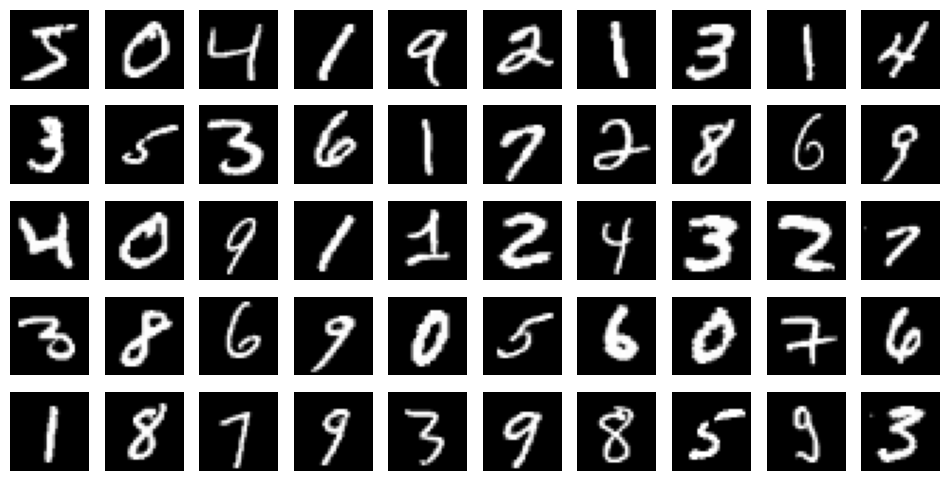

In [4]:
plt.figure(figsize=(12,6))

for i in range(50):
    plt.subplot(5, 10, i + 1)
    reshaped_img = X[i].reshape(28,28)
    plt.imshow(reshaped_img, cmap='gray')
    plt.axis("off")

plt.show()

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید

In [5]:
# calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
centered_data = X - np.mean(X, axis=0)

cov_matrix = np.cov(centered_data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

 حال تعدادی از مولفه های اصلی را استخراج کنید که بخش قابل قبولی از واریانس داده ها را شامل شده باشند

In [6]:
# calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
# Sort the eigenvalues and find the total variance
sorted_index = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_index]
eigenvectors = eigenvectors[:,sorted_index]
total_variance = np.sum(eigenvalues)
explained_variance_coef = 0.7
explained_variance = explained_variance_coef * total_variance

cumulative_variance = 0
num_components = 0

for i in eigenvalues:
    cumulative_variance += i
    num_components += 1
    if cumulative_variance >= explained_variance:
        break

print("Number of components that we need to explain", explained_variance_coef * 100, "% of the variance:", num_components)

Number of components that we need to explain 70.0 % of the variance: 26


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید. عملیات کاهش بعد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید

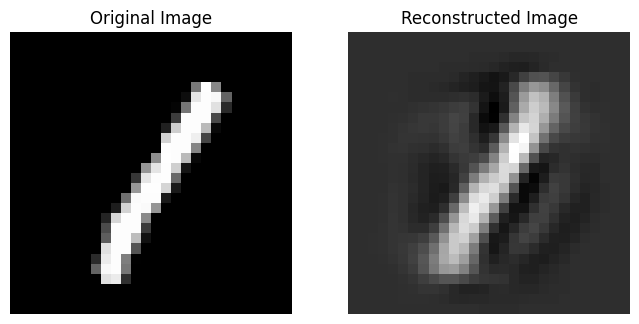

In [7]:
# Project Images into Reduced Dimensionality Eigenbasis
# And Reproject Images to Standard Basis for plotting the reduced component image
# select one sample and reshape it to a 28 by 28 matrix and plot them as image

k = num_components
V = eigenvectors[:, :k]
F = np.dot(X, V)
recons_X = np.dot(F, V.T)

sample_index = 23

plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.imshow(X[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(recons_X[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Reconstructed Image')

plt.show()


حال در این قسمت از تابع آماده پایتون برای کاهش بعد با کرنل های مختلف استفاده کنید و پس از اعمال کاهش بعد، نمودار داده ها را برای هر کرنل استفاده شده رسم کنید و چند نمونه از داده ها را نمایش دهید.

In [8]:
# use python kernel PCA function
# Kernels : RBF - Polynomial - Linear
# plot new dataset after applying kernel pca for each kernels
# show some samples

X = X[0:10000]
y = y[0:10000]
def do_pca(n_components, X):
  #doing pca
  pca = PCA(n_components= n_components)
  proj_X = pca.fit_transform(X)
  recons_X = pca.inverse_transform(proj_X)
  return proj_X, recons_X

def do_kernel_pca(n_components, X, kernel):
  #doing kernel pca
  kpca = KernelPCA(n_components= n_components, kernel= kernel, fit_inverse_transform= True)
  proj_X = kpca.fit_transform(X)
  recons_X = kpca.inverse_transform(proj_X)
  return proj_X, recons_X


proj_X_rbf, recons_X_rbf = do_kernel_pca(10, X, kernel='rbf')
print('RBF Completed')
proj_X_poly, recons_X_poly = do_kernel_pca(10, X, kernel='poly')
print('Poly Completed')
proj_X_linear, recons_X_linear = do_kernel_pca(10, X, kernel='linear')
print('Linear Completed')


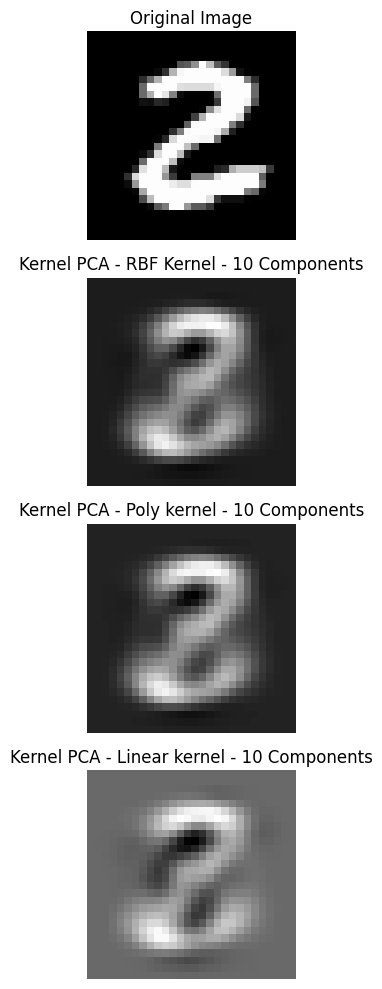

In [24]:
plt.figure(figsize=(40,10))
sample_index = 25

plt.subplot(4, 1, 1)
plt.imshow(X[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Original Image')


plt.subplot(4, 1, 2)
plt.imshow(recons_X_rbf[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Kernel PCA - RBF Kernel - 10 Components')

plt.subplot(4, 1, 3)
plt.imshow(recons_X_poly[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Kernel PCA - Poly kernel - 10 Components')

plt.subplot(4, 1, 4)
plt.imshow(recons_X_linear[sample_index].reshape(28,28), cmap='gray')
plt.axis("off")
plt.title('Kernel PCA - Linear kernel - 10 Components')

plt.tight_layout()
plt.show()

 در این قسمت کاهش بعد را با استفاده از

LDA

انجام دهید و پس از اعمال کاهش بعد ، نمودار داده ها را رسم کنید و چند نمونه از داده ها را نمایش دهید

In [26]:
# use python LDA function
# plot new dataset after applying LDA
# show some samples
def do_lda(n_components, X, y):
  #doing lda
  lda = LinearDiscriminantAnalysis(n_components= n_components)
  proj_X = lda.fit_transform(X, y)
  return proj_X

n_components = 9
proj_X_lda = do_lda(n_components, X, y)

با استفاده از یک طبقه بند به انتخاب خودتان، دیتای بدون کاهش بعد و دیتاست حاصل از هر یک از روش های بالا را طبقه بندی کنید و نتایج را روی دیتاست تست بدست آورید.

In [28]:
# calculate accuracy of original data and projected data on one ml model(choose on your own)
def ML_model(X, y, print_output=True):

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)
    model = RandomForestClassifier(n_estimators=32)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test, y_pred)

    if print_output:
        print("Accuracy: {:.2f}%".format(acc * 100))

    return acc

در ابتدا نتایج را به ازای تعداد کامپوننت‌های مختلف و روش کاهش بعد پی سی ای معمولی بدست میاوریم:

In [ ]:
acc_listـPCA, pc_list = [], []
num_components = [2,5,10,20,50,100,200,300,400,500,600,700,784]
for pc in num_components:
    if pc == 784:
      X_reduced = X
    else:
      X_reduced = do_pca(pc,X)

    acc = ML_model(X_reduced, y, print_output=False)
    print("Components = ",pc," --------- Accuracy = ",acc)
    acc_listـPCA.append(acc)
    pc_list.append(pc)



Components =  2  --------- Accuracy =  0.40914285714285714
Components =  5  --------- Accuracy =  0.7509285714285714
Components =  10  --------- Accuracy =  0.9091428571428571
Components =  20  --------- Accuracy =  0.9435714285714286
Components =  50  --------- Accuracy =  0.9482857142857143
Components =  100  --------- Accuracy =  0.9431428571428572
Components =  200  --------- Accuracy =  0.9302857142857143
Components =  300  --------- Accuracy =  0.9193571428571429
Components =  400  --------- Accuracy =  0.9140714285714285
Components =  500  --------- Accuracy =  0.8931428571428571
Components =  600  --------- Accuracy =  0.8851428571428571
Components =  700  --------- Accuracy =  0.8818571428571429
Components =  784  --------- Accuracy =  0.9640714285714286


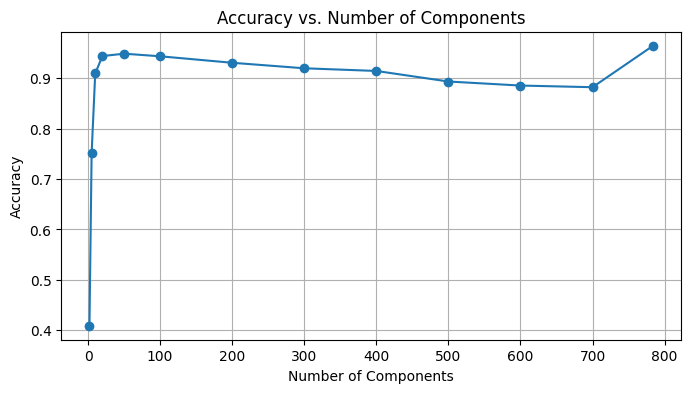

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(pc_list, acc_listـPCA, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Components')
plt.grid()
plt.show()

**Accuracy for LDA method:**

In [38]:
n_components = 9
X_reduced = do_lda(n_components,X,y)
acc_lda = ML_model(X_reduced, y, print_output=False)
acc_original = ML_model(X, y, print_output=False)
print("Original data "," --------- Accuracy = ",acc_original)
print("LDA method, ","Components = ",n_components," --------- Accuracy = ",acc_lda)

Original data   --------- Accuracy =  0.9435
LDA method,  Components =  9  --------- Accuracy =  0.9195


**Accuracy for Kernel PCA method:**

In [39]:
n_components = 10

acc_poly = ML_model(proj_X_poly, y, print_output=False)
acc_rbf = ML_model(proj_X_rbf, y, print_output=False)
acc_linear = ML_model(proj_X_linear, y, print_output=False)
acc_original = ML_model(X, y, print_output=False)

print("Original data "," --------- Accuracy = ",acc_original)
print("Kernel PCA method - Poly kernel, ","Components = ",n_components," --------- Accuracy = ",acc_poly)
print("Kernel PCA method - rbf kernel, ","Components = ",n_components," --------- Accuracy = ",acc_rbf)
print("Kernel PCA method - linear kernel, ","Components = ",n_components," --------- Accuracy = ",acc_linear)

Original data   --------- Accuracy =  0.9445
Kernel PCA method - Poly kernel,  Components =  10  --------- Accuracy =  0.877
Kernel PCA method - rbf kernel,  Components =  10  --------- Accuracy =  0.881
Kernel PCA method - linear kernel,  Components =  10  --------- Accuracy =  0.8905


مشاهده می‌کنیم با تعداد مولفه برابر عملکرد روش ال دی ای، از روی پی سی ای بهتر بوده است.

دقت های بدست آمده را با یکدیگر مقایسه کنید.کاهش بعد تاثیر مثبت بر دقت طبقه بندی داشته است یا منفی؟ بحث کنید



مشاهده می‌کنیم که کاهش بعد در ابتدا باعث افزایش دقت طبقه بندی شده است و از یک‌ جایی به بعد که تعداد مولفه‌ها خیلی کم می‌شود دقت دوباره کاهش پیدا می‌کند. از این موضوع مهم تر حجم محاسباتی طبقه بندی می‌باشد، با کاهش بعد میزان زمان مورد نیاز برای آموزش طبقه بند به شدت کاهش پیدا می‌کند.

ماکسیمم دقت را در حدود ۵۰ بعد گرفتیم، البته با کاهش تا حدود ۲۰ مولفه هم دقت تقریبا همان مقدار ۹۴ درصد باقی‌ می‌ماند ولی اگر از ۲۰ مولفه هم بخواهیم کمتر بیاییم، دقت کاهش پیدا می‌کند.

# Implement an Auto-encoder network


برای پیاده سازی می توانید از کتابخانه های آماده استفاده کنید و ابعاد شبکه نیز به انتخاب خودتان است اما ابعاد لایه  ویژگی (لایه میانی) را به تعداد ابعاد انتخابی خود در بخش قبل در نظر بگیرید.شبکه را با داده آموزش ، آموزش دهید و عملکرد ان را از نظر از دست دادن بازسازی  ارزیابی کنید. از بخش انکودر آموزش دیده برای به دست اوردن نمایش ابعادی کاهش یافته مجموعه داده استفاده کنید. در نظر داشته باشید با افزایش تعداد ایپاک ها کیفیت تصاویر خروجی بهتر خواهند شد

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_flat = x_train.reshape((x_train.shape[0], -1))
x_test_flat = x_test.reshape((x_test.shape[0], -1))

def build_autoencoder(input_dim, encoding_dim):
    input_img = Input(shape=(input_dim,))
    encoded = Dense(encoding_dim, activation='relu')(input_img)

    decoded = Dense(input_dim, activation='sigmoid')(encoded)

    autoencoder = Model(input_img, decoded)

    encoder = Model(input_img, encoded)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder, encoder

def plot_results(x_test, x_test_decoded, encoded_vectors, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(np.expand_dims(encoded_vectors[i], axis=0), cmap='gray')
        plt.title("Encoded")
        plt.axis('off')

        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(x_test_decoded[i].reshape(28, 28), cmap='gray')
        plt.title("Decoded")
        plt.axis('off')
    plt.show()

11490434/11490434 [==============================] - 0s 0us/step


313/313 [==============================] - 1s 2ms/step
Accuracy with 2 components: 0.2879
313/313 [==============================] - 1s 1ms/step
Components: 2


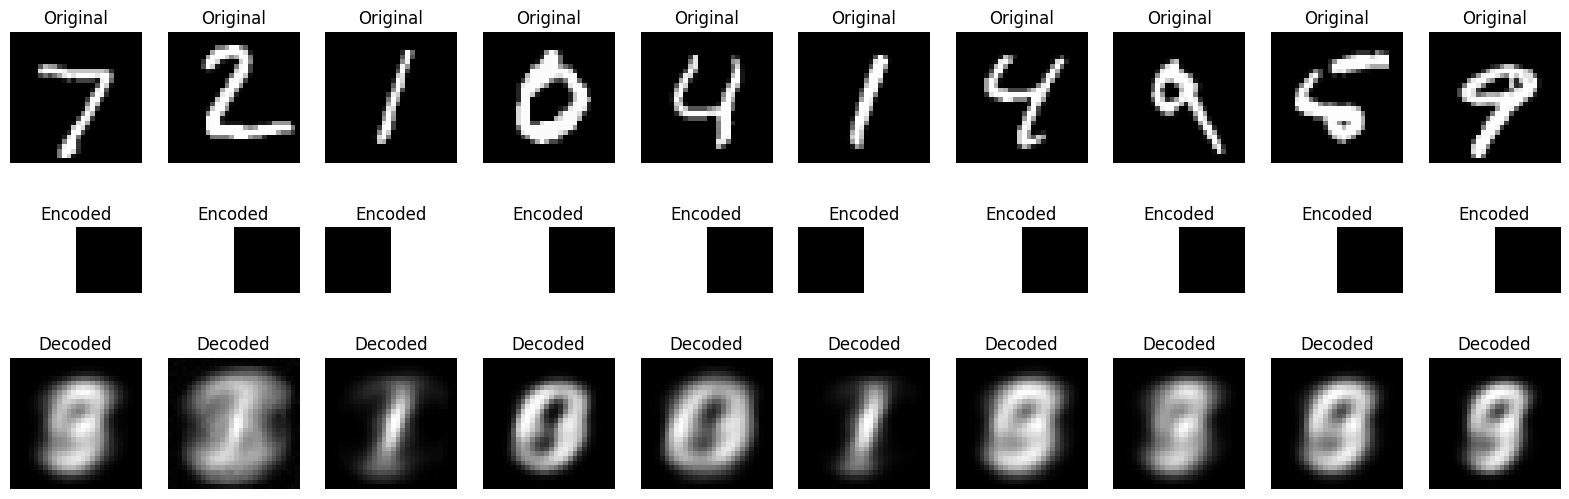

313/313 [==============================] - 0s 1ms/step
Accuracy with 5 components: 0.7401
313/313 [==============================] - 0s 1ms/step
Components: 5


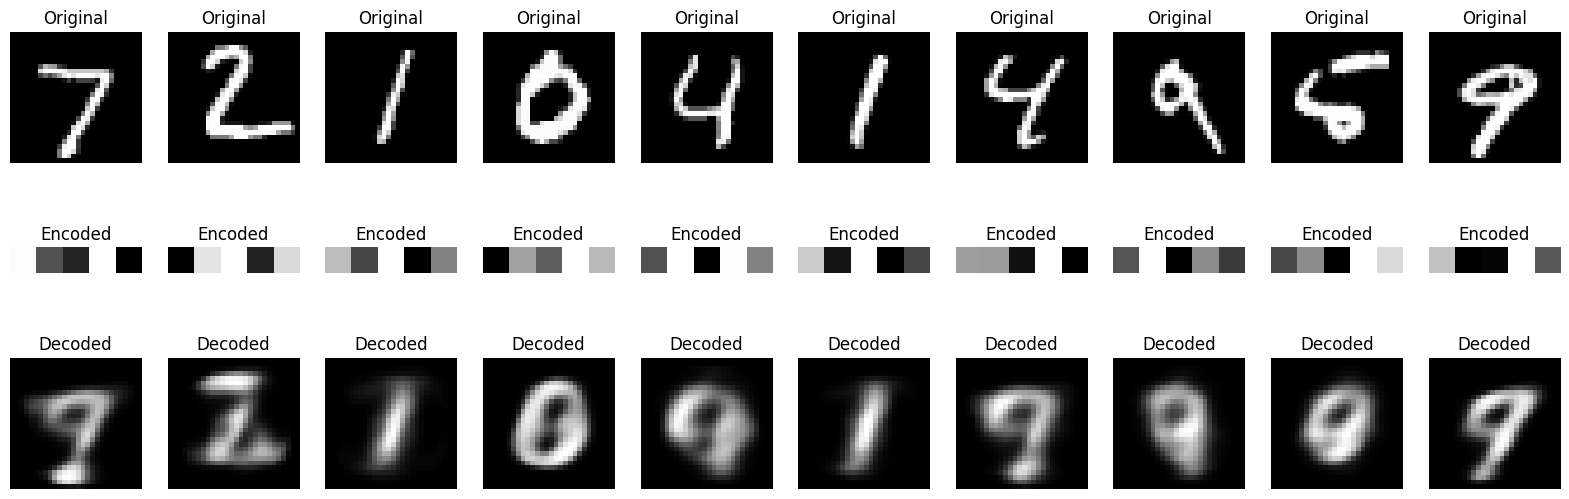

313/313 [==============================] - 0s 1ms/step
Accuracy with 10 components: 0.9034
313/313 [==============================] - 0s 1ms/step
Components: 10


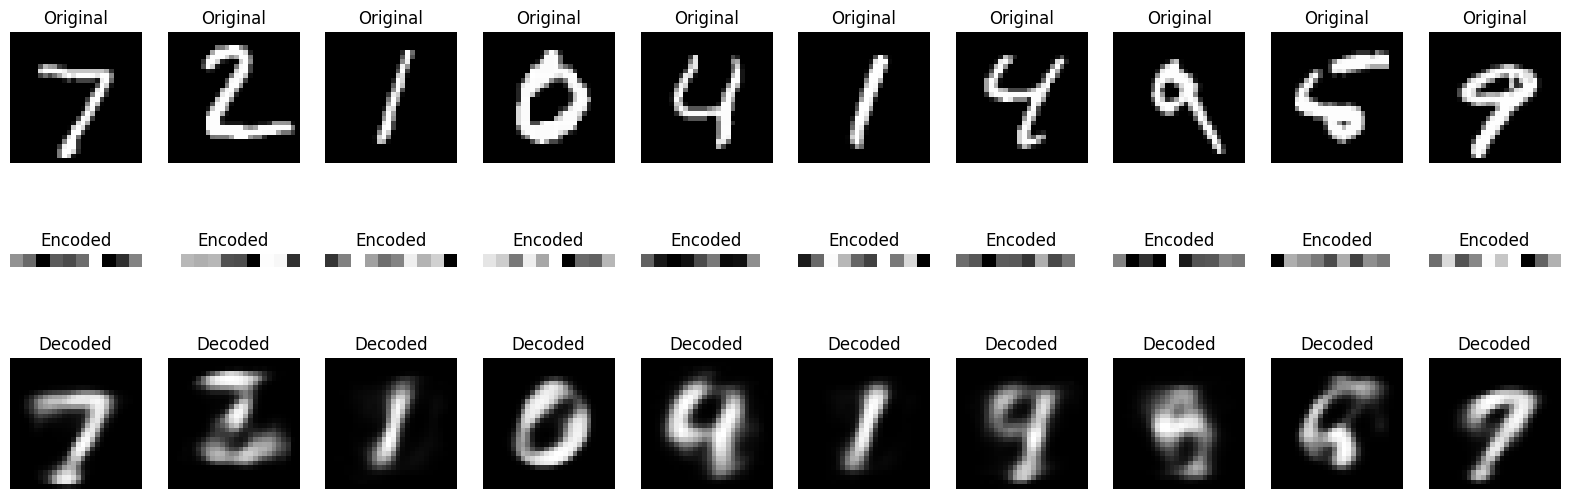

313/313 [==============================] - 0s 1ms/step
Accuracy with 20 components: 0.9352
313/313 [==============================] - 0s 1ms/step
Components: 20


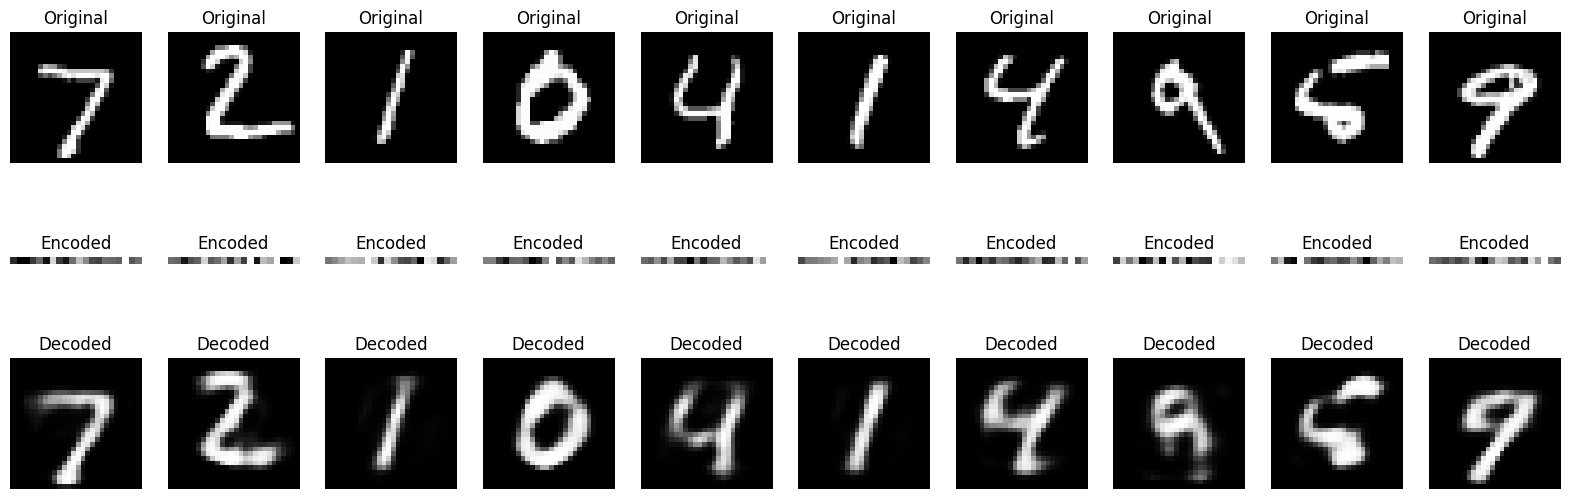

313/313 [==============================] - 1s 2ms/step
Accuracy with 50 components: 0.9355
313/313 [==============================] - 0s 1ms/step
Components: 50


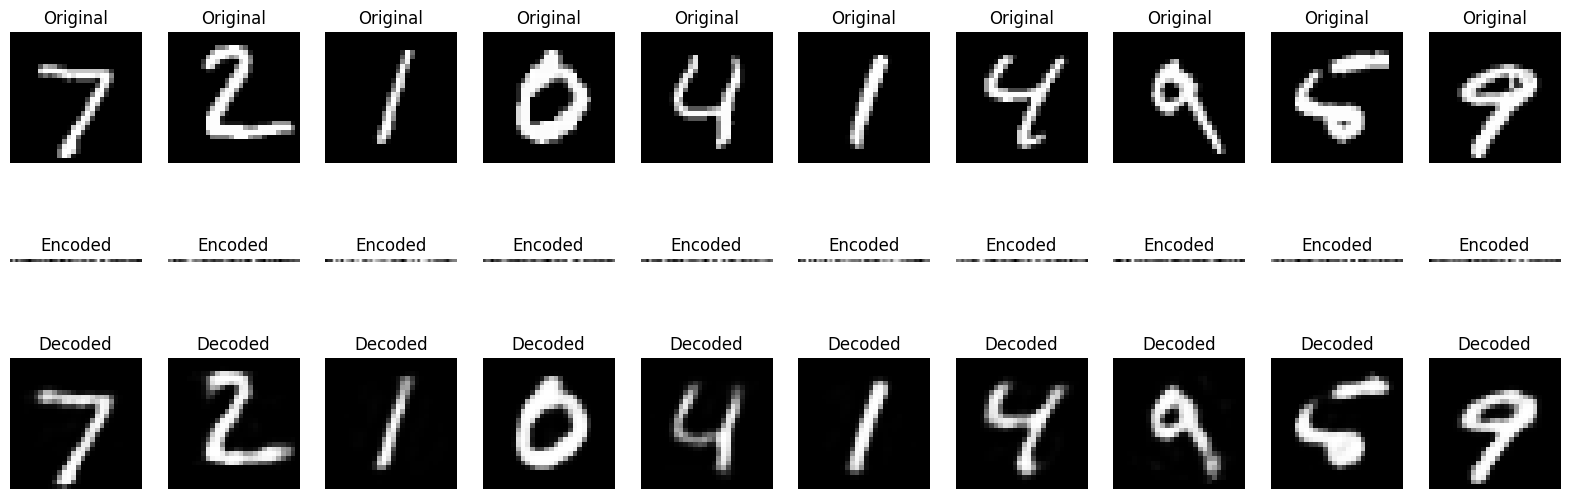

313/313 [==============================] - 0s 1ms/step
Accuracy with 100 components: 0.9313
313/313 [==============================] - 0s 1ms/step
Components: 100


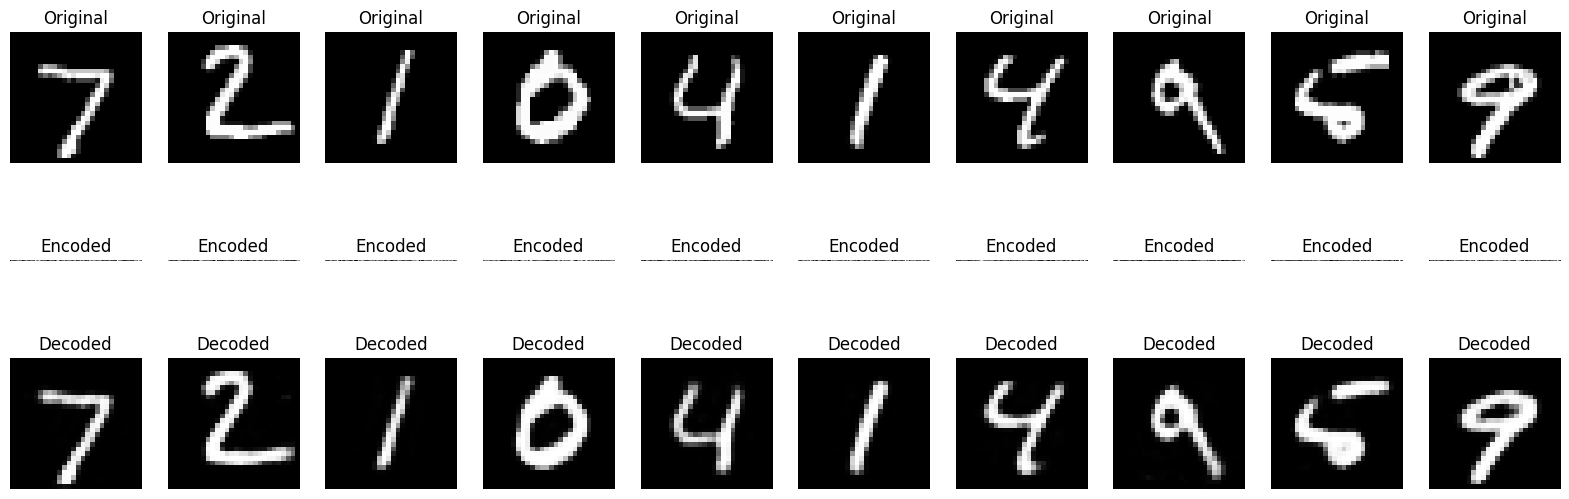

313/313 [==============================] - 1s 2ms/step
Accuracy with 200 components: 0.9289
313/313 [==============================] - 1s 2ms/step
Components: 200


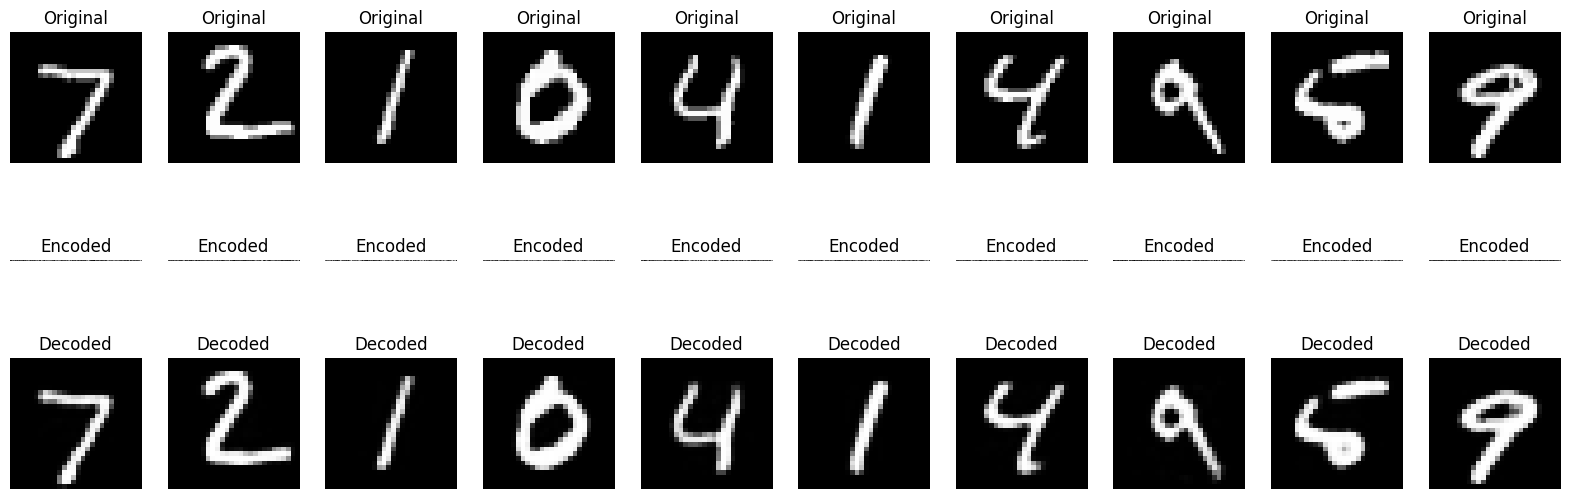

313/313 [==============================] - 0s 1ms/step
Accuracy with 300 components: 0.9255
313/313 [==============================] - 0s 1ms/step
Components: 300


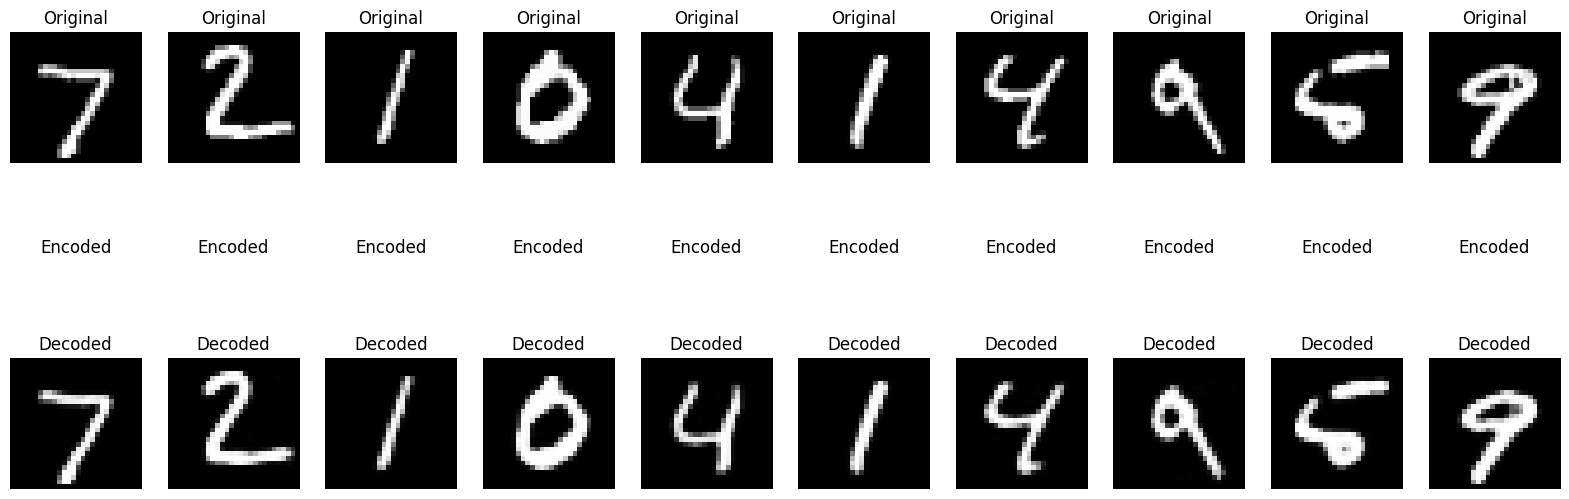

313/313 [==============================] - 0s 1ms/step
Accuracy with 400 components: 0.9302
313/313 [==============================] - 1s 2ms/step
Components: 400


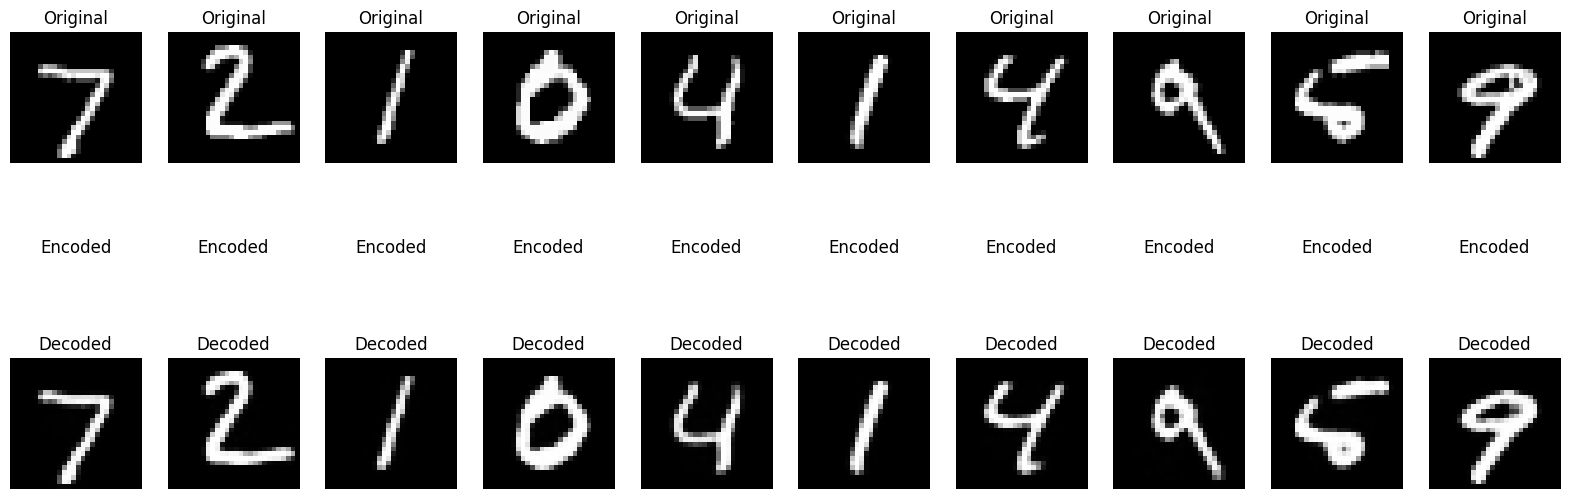

313/313 [==============================] - 0s 1ms/step
Accuracy with 500 components: 0.9324
313/313 [==============================] - 1s 2ms/step
Components: 500


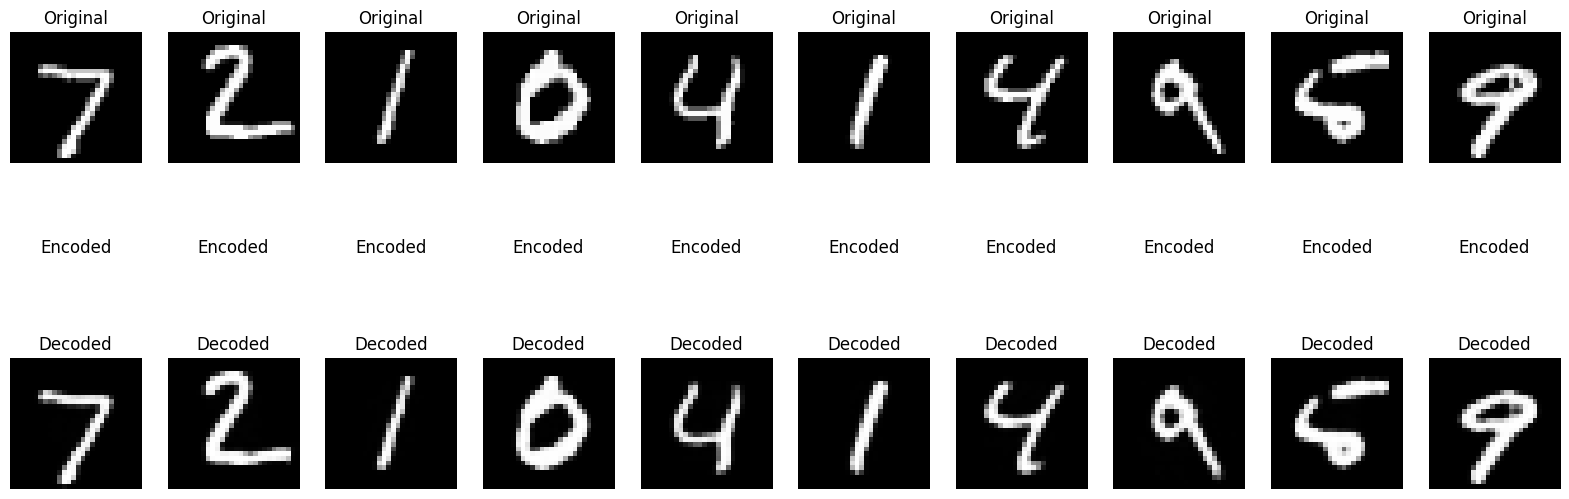

313/313 [==============================] - 0s 1ms/step
Accuracy with 600 components: 0.9307
313/313 [==============================] - 0s 1ms/step
Components: 600


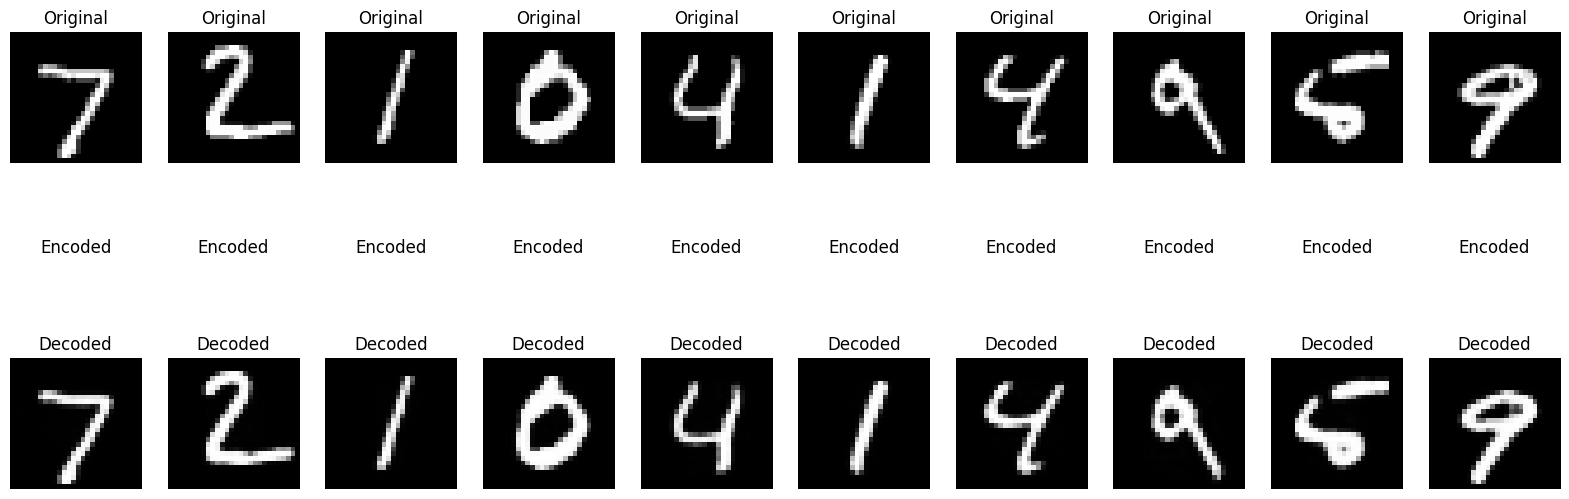

313/313 [==============================] - 0s 1ms/step
Accuracy with 700 components: 0.9297
313/313 [==============================] - 0s 1ms/step
Components: 700


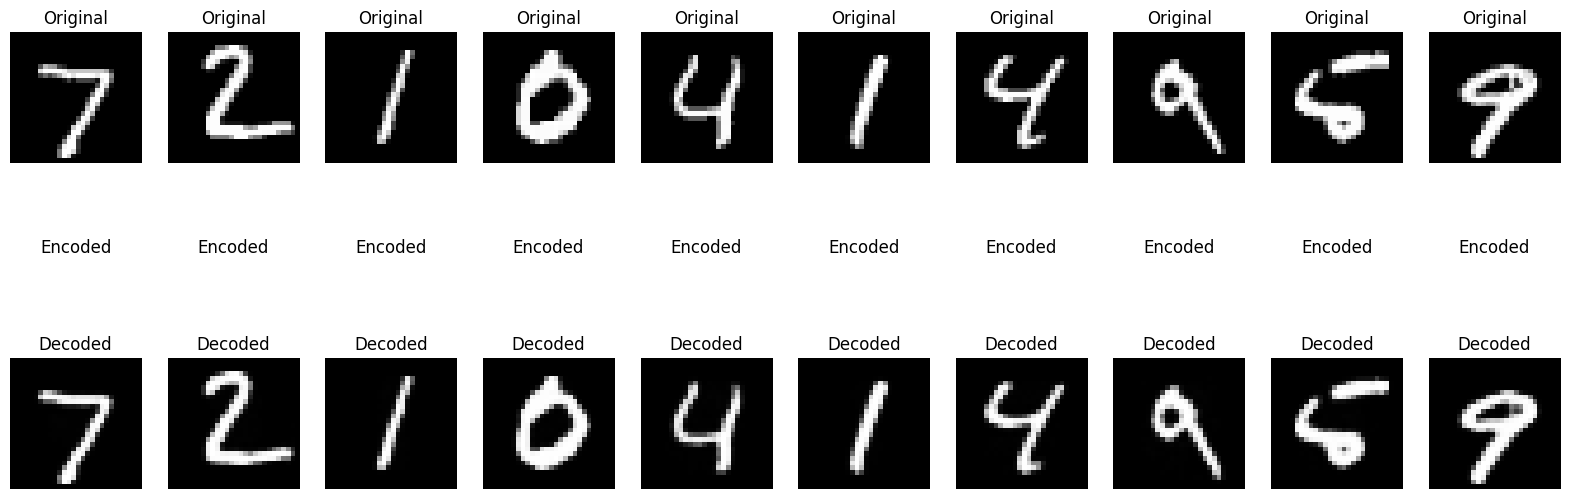

Accuracy with 784 components: 0.9645
313/313 [==============================] - 1s 2ms/step
Components: 784


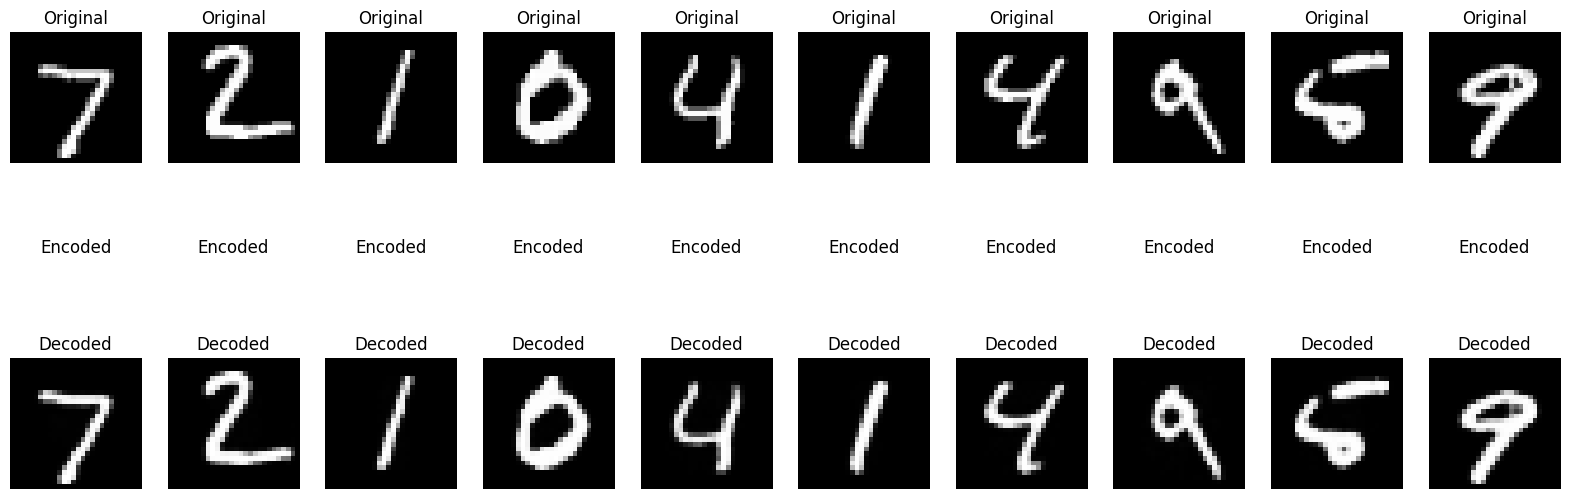

In [ ]:
components_list = [2,5,10,20,50,100,200,300,400,500,600,700,784]
acc_list_AE = []

for components in components_list:

    if components == 784:
      rf_encoded = RandomForestClassifier(n_estimators=32)
      rf_encoded.fit(x_train_flat, y_train)
      y_pred_encoded = rf_encoded.predict(x_test_flat)
    else:
      autoencoder, encoder = build_autoencoder(x_train_flat.shape[1], components)
      autoencoder.fit(x_train_flat, x_train_flat, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_flat, x_test_flat),verbose=0)
      encoded_train = encoder.predict(x_train_flat)
      encoded_test = encoder.predict(x_test_flat)

      rf_encoded = RandomForestClassifier(n_estimators=32)
      rf_encoded.fit(encoded_train, y_train)
      y_pred_encoded = rf_encoded.predict(encoded_test)

    accuracy_encoded = accuracy_score(y_test, y_pred_encoded)
    acc_list_AE.append(accuracy_encoded)
    print(f"Accuracy with {components} components: {accuracy_encoded:.4f}")

    decoded_imgs = autoencoder.predict(x_test_flat)

    print(f"Components: {components}")
    plot_results(x_test, decoded_imgs, encoded_test)


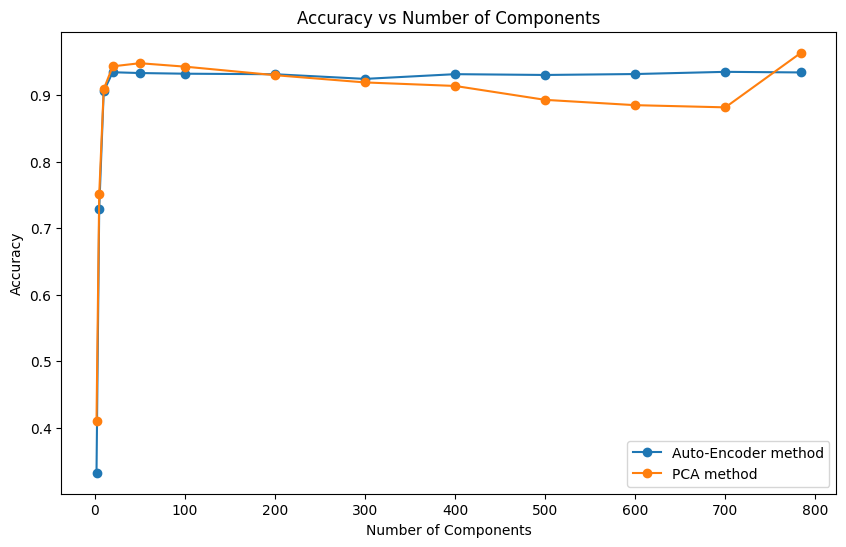

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(components_list, accuracies, marker='o', label='Auto-Encoder method')
plt.plot(components_list, acc_list, marker='o', label='PCA method')
plt.title('Accuracy vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

تفاوت کاهش بعد با استفاده از روش های گفته شده در بخش اول و دوم چیست؟

به صورت کلی می‌توان گفت که مهمترین تفاوت بین این روش و روش‌های قسمت یک این هست
که در این روش نیاز به فاز آموزش داریم ولی در آن روش‌ها نیاز به این مرحله نداشتیم. از نظر عملکرد هم می‌توانیم ببینیم که با کاهش بعد عملکرد این روش بهتر بوده است و به عبارتی میزان کمتری دقت از دست رفته است. اما از نظر محاسباتی این روش پر هزینه تر از روش‌های قسمت اول هست. در دیتاست‌های پیچیده‌تر، عملکرد این شبکه می‌تواند به مراتب بهتر از روش پی سی ای باشد.


### **Question 2:**

## **2.1-**

**Read the given iris dataset and do the necessary pre-processing.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from scipy.spatial.distance import cdist

In [ ]:
df = pd.read_csv("iris.csv")

print("10 random rows of the dataset:")
print(df.sample(10))

10 random rows of the dataset:
     sepal_length  sepal_width  petal_length  petal_width     species
68            6.2          2.2           4.5          1.5  versicolor
147           6.5          3.0           5.2          2.0   virginica
96            5.7          2.9           4.2          1.3  versicolor
82            5.8          2.7           3.9          1.2  versicolor
135           7.7          3.0           6.1          2.3   virginica
139           6.9          3.1           5.4          2.1   virginica
26            5.0          3.4           1.6          0.4      setosa
12            4.8          3.0           1.4          0.1      setosa
18            5.7          3.8           1.7          0.3      setosa
15            5.7          4.4           1.5          0.4      setosa


In [ ]:
species_to_label = {'setosa': 1, 'versicolor': 2, 'virginica': 3}

df['label'] = df['species'].map(species_to_label)

X = df.drop(columns=['species', 'label'])  # Features
y = df['label']  # Target variable

num_cols = X.columns
X_scaled = X.copy()
for col in num_cols:
    mean = X[col].mean()
    std = X[col].std()
    X_scaled[col] = (X[col] - mean) / std

print("5 rows of the preprocessed features:")
print(X_scaled.head())
print('============================================')
print("5 rows of the labels:")
print(y.head())

X = X_scaled.to_numpy()
y = y.to_numpy()


5 rows of the preprocessed features:
   sepal_length  sepal_width  petal_length  petal_width
0     -0.897674     1.028611     -1.336794    -1.308593
1     -1.139200    -0.124540     -1.336794    -1.308593
2     -1.380727     0.336720     -1.393470    -1.308593
3     -1.501490     0.106090     -1.280118    -1.308593
4     -1.018437     1.259242     -1.336794    -1.308593
5 rows of the labels:
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


## **2.2-**

**Implement the K-means algorithm from scratch.**



In [ ]:
def initialize_centroids(X, k, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = cdist(X, centroids, 'euclidean')
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None):
    centroids = initialize_centroids(X, k, random_state)
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return labels, centroids

## **2.3-**

**Implement K-means clustering to group into k categories. Experiment with different values ​​of k and evaluate clustering results using
the criteria introduced in the lesson.**

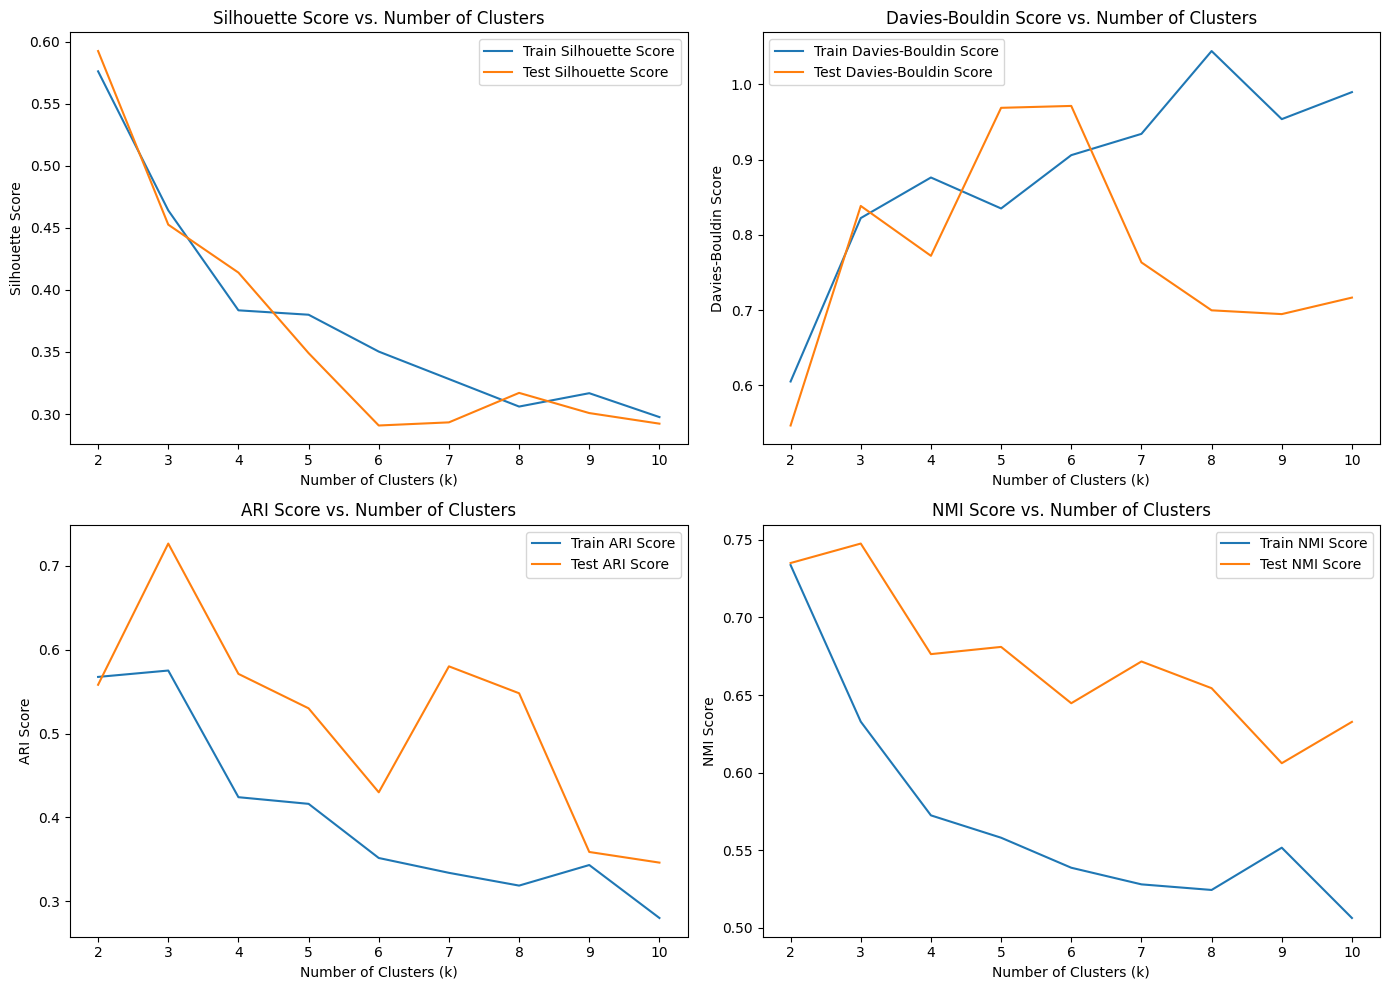

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = range(2, 11)
train_silhouette_scores = []
test_silhouette_scores = []
train_davies_bouldin_scores = []
test_davies_bouldin_scores = []
train_ari_scores = []
test_ari_scores = []
train_nmi_scores = []
test_nmi_scores = []

random_state = 42

for k in k_values:
    train_cluster_labels, train_centroids = kmeans(X_train, k, random_state=random_state)
    test_cluster_labels, test_centroids = kmeans(X_test, k, random_state=random_state)

    train_silhouette_score = silhouette_score(X_train, train_cluster_labels)
    test_silhouette_score = silhouette_score(X_test, test_cluster_labels)

    train_davies_bouldin_score = davies_bouldin_score(X_train, train_cluster_labels)
    test_davies_bouldin_score = davies_bouldin_score(X_test, test_cluster_labels)

    train_ari_score = adjusted_rand_score(y_train, train_cluster_labels)
    test_ari_score = adjusted_rand_score(y_test, test_cluster_labels)

    train_nmi_score = normalized_mutual_info_score(y_train, train_cluster_labels)
    test_nmi_score = normalized_mutual_info_score(y_test, test_cluster_labels)

    train_silhouette_scores.append(train_silhouette_score)
    test_silhouette_scores.append(test_silhouette_score)
    train_davies_bouldin_scores.append(train_davies_bouldin_score)
    test_davies_bouldin_scores.append(test_davies_bouldin_score)
    train_ari_scores.append(train_ari_score)
    test_ari_scores.append(test_ari_score)
    train_nmi_scores.append(train_nmi_score)
    test_nmi_scores.append(test_nmi_score)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(k_values, train_silhouette_scores, label='Train Silhouette Score')
plt.plot(k_values, test_silhouette_scores, label='Test Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(k_values, train_davies_bouldin_scores, label='Train Davies-Bouldin Score')
plt.plot(k_values, test_davies_bouldin_scores, label='Test Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(k_values, train_ari_scores, label='Train ARI Score')
plt.plot(k_values, test_ari_scores, label='Test ARI Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('ARI Score')
plt.title('ARI Score vs. Number of Clusters')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(k_values, train_nmi_scores, label='Train NMI Score')
plt.plot(k_values, test_nmi_scores, label='Test NMI Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('NMI Score')
plt.title('NMI Score vs. Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

## **2.4-**

**Now implement the Gaussian Mixture Model (GMM) algorithm from the scratch.**

In [ ]:
class GMM:
    def __init__(self, n_components, max_iters=100, tol=1e-4, random_state=None):
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.intermediate_means = []  # List to store means after each iteration

    def initialize_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        self.weights = np.ones(self.n_components) / self.n_components
        random_row = np.random.randint(low=0, high=n_samples, size=self.n_components)
        self.means = X[random_row, :]
        self.covariances = np.array([np.cov(X.T) for _ in range(self.n_components)])
        self.intermediate_means.append(self.means.copy())  # Store initial means

    def compute_responsibilities(self, X):
        n_samples, _ = X.shape
        likelihoods = np.zeros((n_samples, self.n_components))

        for i in range(self.n_components):
            likelihoods[:, i] = self.weights[i] * multivariate_normal.pdf(X, self.means[i], self.covariances[i])

        total_likelihood = np.sum(likelihoods, axis=1)[:, np.newaxis]
        responsibilities = likelihoods / total_likelihood
        return responsibilities

    def maximization_step(self, X, responsibilities):
        n_samples, n_features = X.shape

        effective_n_samples = np.sum(responsibilities, axis=0)

        self.weights = effective_n_samples / n_samples
        self.means = np.dot(responsibilities.T, X) / effective_n_samples[:, np.newaxis]
        self.covariances = np.zeros((self.n_components, n_features, n_features))

        for i in range(self.n_components):
            diff = X - self.means[i]
            weighted_diff = responsibilities[:, i][:, np.newaxis] * diff
            self.covariances[i] = np.dot(weighted_diff.T, diff) / effective_n_samples[i]
        self.intermediate_means.append(self.means.copy())  # Store means after maximization step

    def fit(self, X):
        self.initialize_parameters(X)

        log_likelihoods = []

        for iteration in range(self.max_iters):
            responsibilities = self.compute_responsibilities(X)
            self.maximization_step(X, responsibilities)

            log_likelihood = np.sum(np.log(np.sum([self.weights[j] * multivariate_normal.pdf(X, self.means[j], self.covariances[j])
                                                   for j in range(self.n_components)], axis=0)))
            log_likelihoods.append(log_likelihood)

            if iteration > 0 and abs(log_likelihood - log_likelihoods[-2]) < self.tol:
                break

    def predict(self, X):
        responsibilities = self.compute_responsibilities(X)
        return np.argmax(responsibilities, axis=1)

## **2.5-**

**Considering k=3, apply the GMM algorithm on the dataset and plot the result of applying this algorithm on the data for several iterations using
appropriate diagrams. Also plot the final result.**

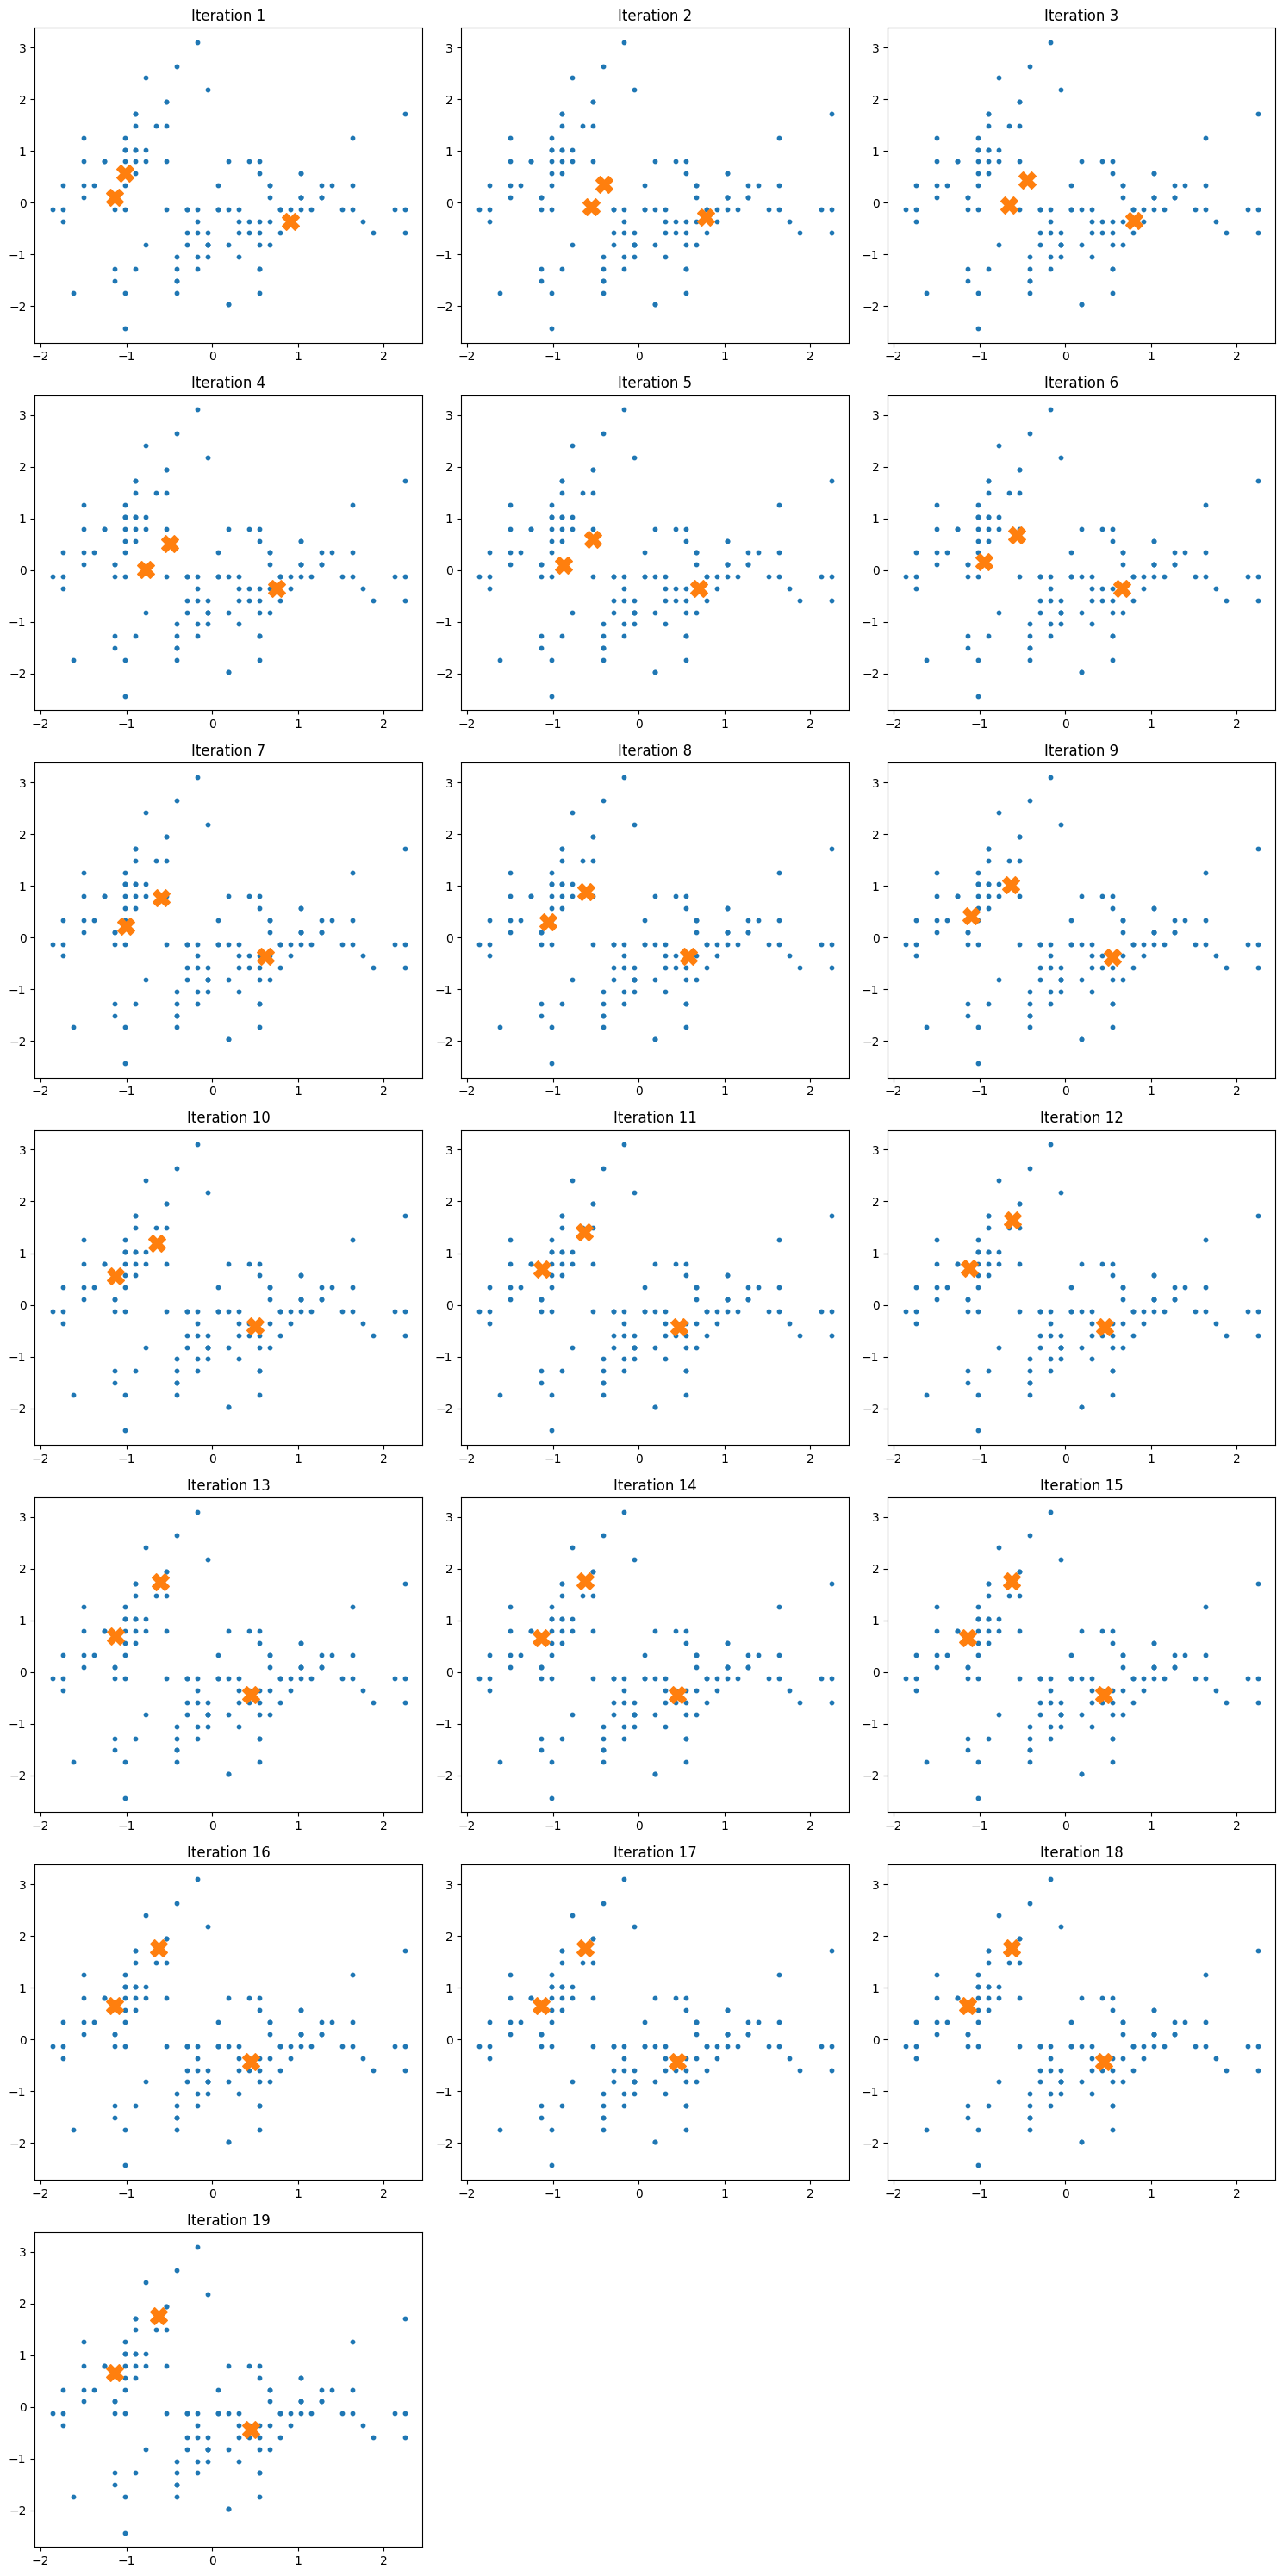

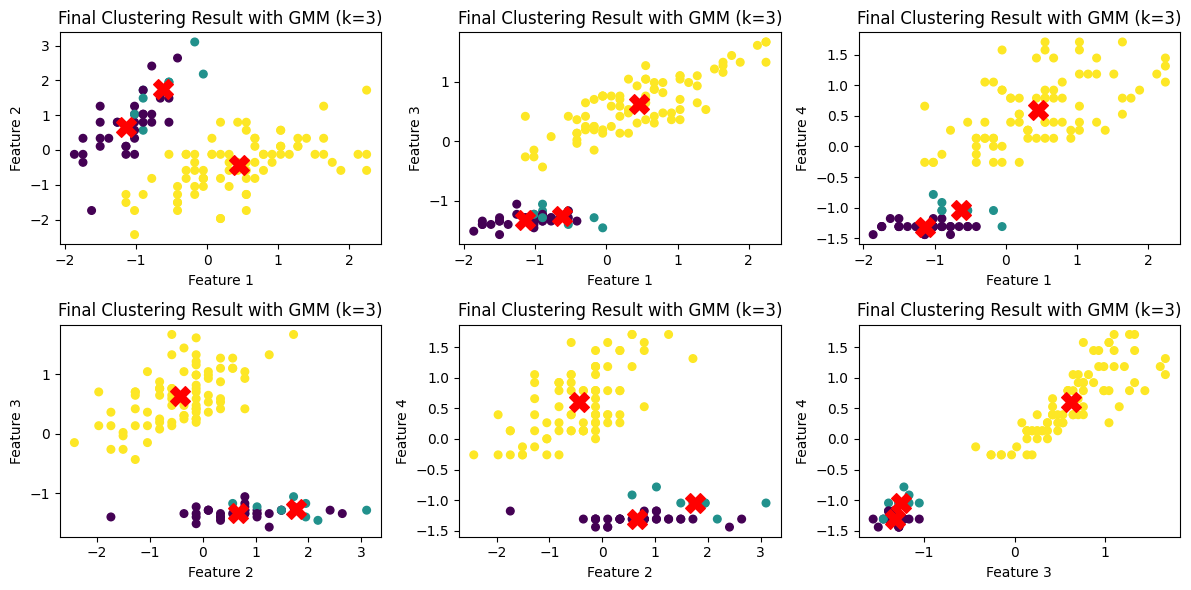

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gmm = GMM(n_components=3, random_state=42)
gmm.fit(X_train)

plt.figure(figsize=(15, 30))
for i, means in enumerate(gmm.intermediate_means):
    plt.subplot(len(gmm.intermediate_means)//3 +1, 3, i+1)
    plt.scatter(X_train[:, 0], X_train[:, 1], s=10)
    plt.scatter(means[:, 0], means[:, 1], s=200, marker='X')
    plt.title(f'Iteration {i+1}')
    if i == len(gmm.intermediate_means) - 1:
        break
plt.tight_layout()
plt.show()

train_cluster_labels = gmm.predict(X_train)
test_cluster_labels = gmm.predict(X_test)

plt.figure(figsize=(12, 6))

plt.subplot(2,3,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(2,3,2)
plt.scatter(X_train[:, 0], X_train[:, 2], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 0], gmm.means[:, 2], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')

plt.subplot(2,3,3)
plt.scatter(X_train[:, 0], X_train[:, 3], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 0], gmm.means[:, 3], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 4')

plt.subplot(2,3,4)
plt.scatter(X_train[:, 1], X_train[:, 2], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 1], gmm.means[:, 2], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 2')
plt.ylabel('Feature 3')

plt.subplot(2,3,5)
plt.scatter(X_train[:, 1], X_train[:, 3], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 1], gmm.means[:, 3], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 2')
plt.ylabel('Feature 4')

plt.subplot(2,3,6)
plt.scatter(X_train[:, 2], X_train[:, 3], c=train_cluster_labels, cmap='viridis', s=30)
plt.scatter(gmm.means[:, 2], gmm.means[:, 3], s=200, c='red', marker='X')
plt.title('Final Clustering Result with GMM (k=3)')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')

plt.tight_layout()
plt.show()




## **2.6-**
**Discuss the strengths and limitations of each clustering technique and their suitability for the Iris dataset.**



#### K-Means Clustering

**Strengths:**
1. **Simplicity**: K-means is easy to implement and understand.
2. **Speed**: It is computationally efficient, especially for large datasets.
3. **Scalability**: K-means works well with large datasets and scales efficiently.
4. **Interpretable Results**: The clusters are represented by their centroids, making it easy to interpret the cluster centers.

**Limitations:**
1. **Cluster Shape Assumption**: K-means assumes that clusters are spherical and equally sized, which may not always be true.
2. **Number of Clusters (k)**: The number of clusters \( k \) must be specified in advance, which can be difficult to determine.
3. **Sensitivity to Initialization**: The results can vary depending on the initial choice of centroids, requiring multiple runs with different initializations.
4. **Sensitivity to Outliers**: K-means is sensitive to outliers, which can skew the cluster centers.

#### Gaussian Mixture Models (GMM)

**Strengths:**
1. **Flexible Cluster Shape**: GMM can model clusters with different shapes, such as elliptical clusters, because it uses covariance matrices.
2. **Probabilistic Assignment**: Each data point is assigned a probability of belonging to each cluster, providing more nuanced clustering information.
3. **Soft Clustering**: Unlike K-means, which performs hard assignments, GMM performs soft assignments, which can be beneficial for datasets where cluster boundaries are not well-defined.
4. **Handles Overlapping Clusters**: GMM is better suited for datasets where clusters overlap.

**Limitations:**
1. **Computational Complexity**: GMM is computationally more intensive than K-means, especially for high-dimensional data.
2. **Number of Components (k)**: Similar to K-means, the number of components \( k \) must be specified in advance.
3. **Initialization Sensitivity**: The results can be sensitive to initial parameters, and poor initialization can lead to suboptimal results.
4. **Convergence Issues**: The EM algorithm used in GMM may converge to local optima, leading to less accurate clustering results.

For the Iris dataset:
- **K-Means** is a good choice for initial exploration due to its simplicity and efficiency. It can provide a quick and reasonable clustering solution.
- **GMM** is a more powerful approach for capturing the underlying distribution of the data, especially if there is overlap between clusters. It is suitable when a more nuanced clustering is required.

In practice, it is often useful to try both methods and compare the results, considering the specific characteristics and requirements of the task at hand.